##Como encontrar nossa submissão?

Nome do grupo: **Flórido**
<br>Posição no placar: 1942
<br>Score: 0.14117

Integrantes do grupo:
*   Isabela Fernandes Gomes Dias
*   Raquel Zimmer
*   Heitor Matozo 
*   Alejandro Pereira 



##Data Preprocessing

Salvamos os arquivos de treino e teste disponibilizados na competição no Google Drive, para podermos executar a importação com mais facilidade.

In [ ]:
# Baixar os dados
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1cNfNrpAxnf9URB_ppuBZFSdXXr1FpZWh' -O training.csv 
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1dpRVtw3KHXoG-o1kRoHBkVC1QT1Kw9te' -O test.csv 

import pandas as pd
import numpy as np

df_test = pd.read_csv('test.csv')
df_training = pd.read_csv('training.csv')

--2021-10-12 01:27:46--  https://docs.google.com/uc?export=download&id=1cNfNrpAxnf9URB_ppuBZFSdXXr1FpZWh
Resolving docs.google.com (docs.google.com)... 142.250.125.100, 142.250.125.139, 142.250.125.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.125.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0626vljs1m8obgefp3jf70qoutpgv7b5/1634002050000/13128899309679025860/*/1cNfNrpAxnf9URB_ppuBZFSdXXr1FpZWh?e=download [following]
--2021-10-12 01:27:46--  https://doc-14-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0626vljs1m8obgefp3jf70qoutpgv7b5/1634002050000/13128899309679025860/*/1cNfNrpAxnf9URB_ppuBZFSdXXr1FpZWh?e=download
Resolving doc-14-b4-docs.googleusercontent.com (doc-14-b4-docs.googleusercontent.com)... 74.125.70.132, 2607:f8b0:4001:c02::84
Connecting to doc-14-b4-docs.googleusercontent.com (doc-14-b

###Mapping Ordinal Features

Os atributos escolhidos para o mapeamento de string para inteiro foram decididos a partir da observação de quais faziam sentido terem suas opções associadas a pesos.


In [ ]:
qual_mapping = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0
}

pavedDrive_mapping = {
    'Y': 3,
    'P': 2,
    'N': 1
}

garageFinish_mapping = {
    'Fin': 3,
    'RFn': 2,
    'Unf': 1,
    'NA': 0
}

centralAir_mapping = {
    'Y': 1,
    'N': 0
}

bsmt_mapping = {
    'GLQ': 6,
    'ALQ': 5,
    'BLQ': 4,
    'Rec': 3,
    'LwQ': 2,
    'Unf': 1,
    'NA': 0
}

utilities_mapping = {
    'AllPub': 4,
    'NoSewr': 3,
    'NoSeWa': 2,
    'ELO': 1
}

df_training[['ExterQual']] = df_training['ExterQual'].map(qual_mapping)
df_training['ExterCond'] = df_training['ExterCond'].map(qual_mapping)
df_training['BsmtQual'] = df_training['BsmtQual'].map(qual_mapping)
df_training['BsmtCond'] = df_training['BsmtCond'].map(qual_mapping)
df_training['HeatingQC'] = df_training['HeatingQC'].map(qual_mapping)
df_training['KitchenQual'] = df_training['KitchenQual'].map(qual_mapping)
df_training['FireplaceQu'] = df_training['FireplaceQu'].map(qual_mapping)
df_training['GarageQual'] = df_training['GarageQual'].map(qual_mapping)
df_training['GarageCond'] = df_training['GarageCond'].map(qual_mapping)
df_training['PoolQC'] = df_training['PoolQC'].map(qual_mapping)

df_training['PavedDrive'] = df_training['PavedDrive'].map(pavedDrive_mapping)

df_training['GarageFinish'] = df_training['GarageFinish'].map(garageFinish_mapping)

df_training['CentralAir'] = df_training['CentralAir'].map(centralAir_mapping)

df_training['BsmtFinType1'] = df_training['BsmtFinType1'].map(bsmt_mapping)
df_training['BsmtFinType2'] = df_training['BsmtFinType2'].map(bsmt_mapping)

df_training['Utilities'] = df_training['Utilities'].map(utilities_mapping)
df_training

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,4,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4.0,3.0,No,6.0,706,1.0,0,150,856,GasA,...,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,NaN,Attchd,2003.0,2.0,2,548,3.0,3.0,3,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,4,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4.0,3.0,Gd,5.0,978,1.0,0,284,1262,GasA,...,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3.0,Attchd,1976.0,2.0,2,460,3.0,3.0,3,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,4,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4.0,3.0,Mn,6.0,486,1.0,0,434,920,GasA,...,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3.0,Attchd,2001.0,2.0,2,608,3.0,3.0,3,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,4,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3.0,4.0,No,5.0,216,1.0,0,540,756,GasA,...,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4.0,Detchd,1998.0,1.0,3,642,3.0,3.0,3,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,4,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4.0,3.0,Av,6.0,655,1.0,0,490,1145,GasA,...,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3.0,Attchd,2000.0,2.0,3,836,3.0,3.0,3,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,4,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,No,1.0,0,1.0,0,953,953,GasA,...,1,SBrkr,953,694,0,1647,0,0,2,1,3,1,3,7,Typ,1,3.0,Attchd,1999.0,2.0,2,460,3.0,3.0,3,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,4,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,3,3,CBlock,4.0,3.0,No,5.0,790,3.0,163,589,1542,GasA,...,1,SBrkr,2073,0,0,2073,1,0,2,0,3,1,3,7,Min1,2,3.0,Attchd,1978.0,1.0,2,500,3.0,3.0,3,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,4,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,5,4,Stone,3.0,4.0,No,6.0,275,1.0,0,877,1152,GasA,...,1,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,4,9,Typ,2,4.0,Attchd,1941.0,2.0,1,252,3.0,3.0,3,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,4,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,3.0,3.0,Mn,6.0,49,3.0,1029,0,1078,GasA,...,1,FuseA,1078,0,0,1078,

Executamos o mesmo mapeamento para o DataSet de teste.

In [ ]:
df_test[['ExterQual']] = df_test['ExterQual'].map(qual_mapping)
df_test['ExterCond'] = df_test['ExterCond'].map(qual_mapping)
df_test['BsmtQual'] = df_test['BsmtQual'].map(qual_mapping)
df_test['BsmtCond'] = df_test['BsmtCond'].map(qual_mapping)
df_test['HeatingQC'] = df_test['HeatingQC'].map(qual_mapping)
df_test['KitchenQual'] = df_test['KitchenQual'].map(qual_mapping)
df_test['FireplaceQu'] = df_test['FireplaceQu'].map(qual_mapping)
df_test['GarageQual'] = df_test['GarageQual'].map(qual_mapping)
df_test['GarageCond'] = df_test['GarageCond'].map(qual_mapping)
df_test['PoolQC'] = df_test['PoolQC'].map(qual_mapping)

df_test['PavedDrive'] = df_test['PavedDrive'].map(pavedDrive_mapping)

df_test['GarageFinish'] = df_test['GarageFinish'].map(garageFinish_mapping)

df_test['CentralAir'] = df_test['CentralAir'].map(centralAir_mapping)

df_test['BsmtFinType1'] = df_test['BsmtFinType1'].map(bsmt_mapping)
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].map(bsmt_mapping)

df_test['Utilities'] = df_test['Utilities'].map(utilities_mapping)
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,4.0,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3.0,3.0,No,3.0,468.0,2.0,144.0,270.0,882.0,GasA,3,1,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,3.0,5,Typ,0,NaN,Attchd,1961.0,1.0,1.0,730.0,3.0,3.0,3,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,4.0,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,3,3,CBlock,3.0,3.0,No,5.0,923.0,1.0,0.0,406.0,1329.0,GasA,3,1,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,4.0,6,Typ,0,NaN,Attchd,1958.0,1.0,1.0,312.0,3.0,3.0,3,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,4.0,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,No,6.0,791.0,1.0,0.0,137.0,928.0,GasA,4,1,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,3.0,6,Typ,1,3.0,Attchd,1997.0,3.0,2.0,482.0,3.0,3.0,3,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,4.0,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,3,3,PConc,3.0,3.0,No,6.0,602.0,1.0,0.0,324.0,926.0,GasA,5,1,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,4.0,7,Typ,1,4.0,Attchd,1998.0,3.0,2.0,470.0,3.0,3.0,3,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,4.0,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,PConc,4.0,3.0,No,5.0,263.0,1.0,0.0,1017.0,1280.0,GasA,5,1,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,4.0,5,Typ,0,NaN,Attchd,1992.0,2.0,2.0,506.0,3.0,3.0,3,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,4.0,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3.0,3.0,No,1.0,0.0,1.0,0.0,546.0,546.0,GasA,4,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3.0,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,3,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,4.0,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3.0,3.0,No,3.0,252.0,1.0,0.0,294.0,546.0,GasA,3,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3.0,6,Typ,0,NaN,CarPort,1970.0,1.0,1.0,286.0,3.0,3.0,3,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,4.0,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3.0,3.0,No,5.0,1224.0,1.0,0.0,0.0,1224.0,GasA,5,1,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,3.0,7,Typ,1,3.0,Detchd,1960.0,1.0,2.0,576.0,3.0,3.0,3,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,4.0,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoar

###One-Hot

Para os atributos categórigos que não foi possível definir uma escala entre as opções, executamos o One-Hot a fim de tranformar cada alternativa em uma nova coluna. 

In [ ]:
categoricos = df_training.select_dtypes(include=["object"]).columns
numericos = df_training.select_dtypes(exclude = ["object"]).columns
print(categoricos)
print('-------------')
print(numericos)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating', 'Electrical',
       'Functional', 'GarageType', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')
-------------
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Utilities',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageY

In [ ]:
df_training_num = df_training[numericos]
df_training_cat = df_training[categoricos]

In [ ]:
df_teste_num = df_test[numericos.drop('SalePrice')]
df_teste_cat = df_test[categoricos]

In [ ]:
df_training_cat = pd.get_dummies(df_training_cat)
df_teste_cat = pd.get_dummies(df_teste_cat)

Também executamos o One-Hot no DataSet de teste.

In [ ]:
df_teste_final = pd.concat([df_teste_num, df_teste_cat], axis=1)
df_teste_final

,Id,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,...,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,4.0,5,6,1961,1961,0.0,3,3,3.0,3.0,3.0,468.0,2.0,144.0,270.0,882.0,3,1,896,0,0,896,0.0,0.0,1,0,2,1,3.0,5,0,NaN,1961.0,1.0,1.0,730.0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,4.0,6,6,1958,1958,108.0,3,3,3.0,3.0,5.0,923.0,1.0,0.0,406.0,1329.0,3,1,1329,0,0,1329,0.0,0.0,1,1,3,1,4.0,6,0,NaN,1958.0,1.0,1.0,312.0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,4.0,5,5,1997,1998,0.0,3,3,4.0,3.0,6.0,791.0,1.0,0.0,137.0,928.0,4,1,928,701,0,1629,0.0,0.0,2,1,3,1,3.0,6,1,3.0,1997.0,3.0,2.0,482.0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,4.0,6,6,1998,1998,20.0,3,3,3.0,3.0,6.0,602.0,1.0,0.0,324.0,926.0,5,1,926,678,0,1604,0.0,0.0,2,1,3,1,4.0,7,1,4.0,1998.0,3.0,2.0,470.0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,4.0,8,5,1992,1992,0.0,4,3,4.0,3.0,5.0,263.0,1.0,0.0,1017.0,1280.0,5,1,1280,0,0,1280,0.0,0.0,2,0,2,1,4.0,5,0,NaN,1992.0,2.0,2.0,506.0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4.0,4,7,1970,1970,0.0,3,3,3.0,3.0,1.0,0.0,1.0,0.0,546.0,546.0,4,1,546,546,0,1092,0.0,0.0,1,1,3,1,3.0,5,0,NaN,NaN,NaN,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4.0,4,5,1970,1970,0.0,3,3,3.0,3.0,3.0,252.0,1.0,0.0,294.0,546.0,3,1,546,546,0,1092,0.0,0.0,1,1,3,1,3.0,6,0,NaN,1970.0,1.0,1.0,286.0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,4.0,5,7,1960,1996,0.0,3,3,3.0,3.0,5.0,1224.0,1.0,0.0,0.0,1224.0,5,1,1224,0,0,1224,1.0,0.0,1,0,4,1,3.0,7,1,3.0,1960.0,1.0,2.0,576.0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,4.0,5,5,1992,1992,0.0,3,3,4.0,3.0,6.0,337.0,1.0,0.0,575.0,912.0,3,1,970,0,0,970,0.0,1.0,1,0,3,1,3.0,6,0,NaN,NaN,NaN,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_training_final = pd.concat([df_training_num, df_training_cat], axis=1)
df_training_final

,Id,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,...,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,4,7,5,2003,2003,196.0,4,3,4.0,3.0,6.0,706,1.0,0,150,856,5,1,856,854,0,1710,1,0,2,1,3,1,4,8,0,NaN,2003.0,2.0,2,548,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,4,6,8,1976,1976,0.0,3,3,4.0,3.0,5.0,978,1.0,0,284,1262,5,1,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3.0,1976.0,2.0,2,460,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,4,7,5,2001,2002,162.0,4,3,4.0,3.0,6.0,486,1.0,0,434,920,5,1,920,866,0,1786,1,0,2,1,3,1,4,6,1,3.0,2001.0,2.0,2,608,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,4,7,5,1915,1970,0.0,3,3,3.0,4.0,5.0,216,1.0,0,540,756,4,1,961,756,0,1717,1,0,1,0,3,1,4,7,1,4.0,1998.0,1.0,3,642,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,4,8,5,2000,2000,350.0,4,3,4.0,3.0,6.0,655,1.0,0,490,1145,5,1,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3.0,2000.0,2.0,3,836,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,4,6,5,1999,2000,0.0,3,3,4.0,3.0,1.0,0,1.0,0,953,953,5,1,953,694,0,1647,0,0,2,1,3,1,3,7,1,3.0,1999.0,2.0,2,460,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,4,6,6,1978,1988,119.0,3,3,4.0,3.0,5.0,790,3.0,163,589,1542,3,1,2073,0,0,2073,1,0,2,0,3,1,3,7,2,3.0,1978.0,1.0,2,500,...,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,4,7,9,1941,2006,0.0,5,4,3.0,4.0,6.0,275,1.0,0,877,1152,5,1,1188,1152,0,2340,0,0,2,0,4,1,4,9,2,4.0,1941.0,2.0,1,252,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,4,5,6,1950,1996,0.0,3,3,3.0,3.0,6.0,49,3.0,1029,0,1078,4,1,1078,0,0,1078,1,0,1,0,2,1,4,5,0,NaN,1950.0,1.0,1,240,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


Percebemos que ao final do One-Hot, o DataSet de treinamento apresentou mais colunas que o DataSet de teste, isso porque haviam atributos categóricos que apareciam nos dados de treino porém não apareciam nos dados de teste.

Para corrigir isso, adicionamos as colunas faltantes no DataSet de teste com o valor 0.

In [ ]:
df_diff = df_training_final.columns.difference(df_teste_final.columns)
df_diff = df_diff.drop('SalePrice')
df_diff

Index(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'MiscFeature_TenC', 'RoofMatl_ClyTile',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll'],
      dtype='object')

In [ ]:
df_teste_final[df_diff] = 0

cols_when_model_builds = df_training_final.columns.drop('SalePrice')
df_teste_final = df_teste_final[cols_when_model_builds]
df_teste_final

,Id,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,...,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,4.0,5,6,1961,1961,0.0,3,3,3.0,3.0,3.0,468.0,2.0,144.0,270.0,882.0,3,1,896,0,0,896,0.0,0.0,1,0,2,1,3.0,5,0,NaN,1961.0,1.0,1.0,730.0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,4.0,6,6,1958,1958,108.0,3,3,3.0,3.0,5.0,923.0,1.0,0.0,406.0,1329.0,3,1,1329,0,0,1329,0.0,0.0,1,1,3,1,4.0,6,0,NaN,1958.0,1.0,1.0,312.0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,4.0,5,5,1997,1998,0.0,3,3,4.0,3.0,6.0,791.0,1.0,0.0,137.0,928.0,4,1,928,701,0,1629,0.0,0.0,2,1,3,1,3.0,6,1,3.0,1997.0,3.0,2.0,482.0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,4.0,6,6,1998,1998,20.0,3,3,3.0,3.0,6.0,602.0,1.0,0.0,324.0,926.0,5,1,926,678,0,1604,0.0,0.0,2,1,3,1,4.0,7,1,4.0,1998.0,3.0,2.0,470.0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,4.0,8,5,1992,1992,0.0,4,3,4.0,3.0,5.0,263.0,1.0,0.0,1017.0,1280.0,5,1,1280,0,0,1280,0.0,0.0,2,0,2,1,4.0,5,0,NaN,1992.0,2.0,2.0,506.0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4.0,4,7,1970,1970,0.0,3,3,3.0,3.0,1.0,0.0,1.0,0.0,546.0,546.0,4,1,546,546,0,1092,0.0,0.0,1,1,3,1,3.0,5,0,NaN,NaN,NaN,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4.0,4,5,1970,1970,0.0,3,3,3.0,3.0,3.0,252.0,1.0,0.0,294.0,546.0,3,1,546,546,0,1092,0.0,0.0,1,1,3,1,3.0,6,0,NaN,1970.0,1.0,1.0,286.0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,4.0,5,7,1960,1996,0.0,3,3,3.0,3.0,5.0,1224.0,1.0,0.0,0.0,1224.0,5,1,1224,0,0,1224,1.0,0.0,1,0,4,1,3.0,7,1,3.0,1960.0,1.0,2.0,576.0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,4.0,5,5,1992,1992,0.0,3,3,4.0,3.0,6.0,337.0,1.0,0.0,575.0,912.0,3,1,970,0,0,970,0.0,1.0,1,0,3,1,3.0,6,0,NaN,NaN,NaN,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


###Dealing With Missing Data 

Para lidar com possíveis dados nulos, preenchemos os mesmos com a média dos demais exemplos.

In [ ]:
from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.nan, strategy = 'mean')
idf = pd.DataFrame(imr.fit_transform(df_training_final))
idf.columns=df_training_final.columns
idf.index=df_training_final.index
df_training_final = idf
df_training_final

,Id,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,...,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,4.0,7.0,5.0,2003.0,2003.0,196.0,4.0,3.0,4.0,3.0,6.0,706.0,1.0,0.0,150.0,856.0,5.0,1.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,4.0,8.0,0.0,3.461039,2003.0,2.0,2.0,548.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,80.0,9600.0,4.0,6.0,8.0,1976.0,1976.0,0.0,3.0,3.0,4.0,3.0,5.0,978.0,1.0,0.0,284.0,1262.0,5.0,1.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3.0,6.0,1.0,3.000000,1976.0,2.0,2.0,460.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,68.0,11250.0,4.0,7.0,5.0,2001.0,2002.0,162.0,4.0,3.0,4.0,3.0,6.0,486.0,1.0,0.0,434.0,920.0,5.0,1.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,4.0,6.0,1.0,3.000000,2001.0,2.0,2.0,608.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,60.0,9550.0,4.0,7.0,5.0,1915.0,1970.0,0.0,3.0,3.0,3.0,4.0,5.0,216.0,1.0,0.0,540.0,756.0,4.0,1.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,4.0,7.0,1.0,4.000000,1998.0,1.0,3.0,642.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,84.0,14260.0,4.0,8.0,5.0,2000.0,2000.0,350.0,4.0,3.0,4.0,3.0,6.0,655.0,1.0,0.0,490.0,1145.0,5.0,1.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,4.0,9.0,1.0,3.000000,2000.0,2.0,3.0,836.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,4.0,6.0,5.0,1999.0,2000.0,0.0,3.0,3.0,4.0,3.0,1.0,0.0,1.0,0.0,953.0,953.0,5.0,1.0,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,3.0,7.0,1.0,3.000000,1999.0,2.0,2.0,460.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1457.0,20.0,85.0,13175.0,4.0,6.0,6.0,1978.0,1988.0,119.0,3.0,3.0,4.0,3.0,5.0,790.0,3.0,163.0,589.0,1542.0,3.0,1.0,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,3.0,7.0,2.0,3.000000,1978.0,1.0,2.0,500.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,1458.0,70.0,66.0,9042.0,4.0,

###Partitioning in Training and Test Sets

Como o DataSet de teste disponibilizado pela competição não possui a coluna 'SalePrice', particionamos o DataSet de treino: 30% dos dados para teste e 70% para treinamento.

In [ ]:
from sklearn.model_selection import train_test_split

x, y = df_training_final.drop('SalePrice', axis=1), df_training_final['SalePrice']
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state = 0)

###Normalization

Com a finalidade de deixar todos os dados na mesma escala, para que os modelos não considerassem atributos com maiores valores sendo atributos de pesos maiores, normalizamos os dados.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.transform(x_test)
x_train_norm

array([[0.04386566, 0.23529412, 0.16797931, ..., 0.        , 1.        ,
        0.        ],
       [0.46744345, 0.58823529, 0.16797931, ..., 0.        , 1.        ,
        0.        ],
       [0.65798492, 0.        , 0.09931507, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.83344757, 0.41176471, 0.1609589 , ..., 0.        , 1.        ,
        0.        ],
       [0.38313914, 0.58823529, 0.16797931, ..., 0.        , 1.        ,
        0.        ],
       [0.46881426, 0.23529412, 0.12671233, ..., 0.        , 1.        ,
        0.        ]])

A normalização também foi aplicada nos dados de teste.


In [ ]:
x_test_final_norm = mms.fit_transform(df_teste_final)
x_test_final_norm

array([[0.00000000e+00, 0.00000000e+00, 3.29608939e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.85871056e-04, 0.00000000e+00, 3.35195531e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.37174211e-03, 2.35294118e-01, 2.96089385e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [9.98628258e-01, 0.00000000e+00, 7.76536313e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99314129e-01, 3.82352941e-01, 2.29050279e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.35294118e-01, 2.96089385e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

###Standardization

Como uma alternativa à normalização, implementamos também a estandardização.

In [ ]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)

In [ ]:
x_test_final_std = stdsc.fit_transform(df_teste_final)

Testamos os modelos com a normalização e a estandardização, e observamos que os dados estandardizados apresentaram um melhor resultado. Portanto, optamos por utilizá-lo nas submissões.

##Hyperparameter Adjustment

Para a primeira submissão ajustamos os hiperparâmetros do XGBoost através de tentativas e erros, dessa forma percebemos que a diminuição da taxa de aprendizado tinha maior impacto nos resultados do que os demais parâmetros.

Já para a segunda submissão, implementamos um algoritmo que encontra os melhores hiperparâmetros a fim de melhorar nossas predições.

In [ ]:
import xgboost as xgboost
from sklearn.model_selection import cross_val_score

def score_dataset(X, y, model=xgboost.XGBRegressor()):
  log_y = np.log(y) 
  score = cross_val_score(
      model, X, log_y, cv=5, scoring="neg_mean_squared_error")
  score = -1 * score.mean()
  score = np.sqrt(score)
  return score

In [ ]:
#!pip install optuna 
import optuna
import xgboost as xgboost

def objective(trial):
    xgb_params = dict(
        max_depth=trial.suggest_int("max_depth", 3, 5),
        learning_rate=trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        n_estimators=trial.suggest_int("n_estimators", 2000, 5000),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 3),
        colsample_bytree=trial.suggest_float("coflsample_bytree", 0.2, .7),
        subsample=trial.suggest_float("subsample", 0.2, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
        reg_lambda=trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
    )
    xgb = xgboost.XGBRegressor(**xgb_params, random_state = 42) 
    return score_dataset(x_train_std, y_train, xgb)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
xgb_params = study.best_params
xgb_params

[I 2021-10-12 01:06:34,321] A new study created in memory with name: no-name-260f0f23-d781-4a23-aabd-34efbe13f1ba


[01:06:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:07:33,805] Trial 0 finished with value: 0.15021967444920112 and parameters: {'max_depth': 4, 'learning_rate': 0.004108525671664448, 'n_estimators': 4783, 'min_child_weight': 3, 'coflsample_bytree': 0.5859611216502293, 'subsample': 0.3161640541834803, 'reg_alpha': 3.4984855943772364, 'reg_lambda': 0.004133088272720462}. Best is trial 0 with value: 0.15021967444920112.


[01:07:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:08:02,760] Trial 1 finished with value: 7.310911772910649 and parameters: {'max_depth': 5, 'learning_rate': 0.00011060374423120276, 'n_estimators': 4124, 'min_child_weight': 3, 'coflsample_bytree': 0.42233555002987677, 'subsample': 0.2035452898590971, 'reg_alpha': 0.23959733592083368, 'reg_lambda': 0.001116056644624639}. Best is trial 0 with value: 0.15021967444920112.


[01:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:08:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:08:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:08:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:09:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:09:35,244] Trial 2 finished with value: 0.16933623323143052 and parameters: {'max_depth': 5, 'learning_rate': 0.0014421673096624164, 'n_estimators': 4997, 'min_child_weight': 2, 'coflsample_bytree': 0.5941247108692703, 'subsample': 0.6533660021069307, 'reg_alpha': 4.411532461877092, 'reg_lambda': 14.417056854213007}. Best is trial 0 with value: 0.15021967444920112.


[01:09:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:09:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:09:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:09:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:09:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:09:52,573] Trial 3 finished with value: 8.047407561163755 and parameters: {'max_depth': 4, 'learning_rate': 0.00012581966306819258, 'n_estimators': 3007, 'min_child_weight': 3, 'coflsample_bytree': 0.3839014449559581, 'subsample': 0.5844205341192438, 'reg_alpha': 28.49364662915743, 'reg_lambda': 20.976338411542653}. Best is trial 0 with value: 0.15021967444920112.


[01:09:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:09:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:10:16,134] Trial 4 finished with value: 0.13900793704991546 and parameters: {'max_depth': 3, 'learning_rate': 0.003515940022542739, 'n_estimators': 2121, 'min_child_weight': 3, 'coflsample_bytree': 0.3512604490737854, 'subsample': 0.5559480639713066, 'reg_alpha': 0.1334044422163182, 'reg_lambda': 0.00016923523653071898}. Best is trial 4 with value: 0.13900793704991546.


[01:10:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:10:31,493] Trial 5 finished with value: 6.249493854709028 and parameters: {'max_depth': 5, 'learning_rate': 0.00022428366484334475, 'n_estimators': 2740, 'min_child_weight': 2, 'coflsample_bytree': 0.43447948585340734, 'subsample': 0.25033373979161766, 'reg_alpha': 0.012685415327772457, 'reg_lambda': 0.2557210319735134}. Best is trial 4 with value: 0.13900793704991546.


[01:10:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:10:58,890] Trial 6 finished with value: 0.18625813705444363 and parameters: {'max_depth': 3, 'learning_rate': 0.002168823400885075, 'n_estimators': 2803, 'min_child_weight': 2, 'coflsample_bytree': 0.403432509017448, 'subsample': 0.7347114586009431, 'reg_alpha': 7.440689885706018, 'reg_lambda': 0.00546373376504412}. Best is trial 4 with value: 0.13900793704991546.


[01:10:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:11:48,322] Trial 7 finished with value: 0.31262589636553195 and parameters: {'max_depth': 5, 'learning_rate': 0.0017692658889703246, 'n_estimators': 2680, 'min_child_weight': 1, 'coflsample_bytree': 0.6697506175676675, 'subsample': 0.6113345664876708, 'reg_alpha': 5.8121612679878805, 'reg_lambda': 42.777332120823324}. Best is trial 4 with value: 0.13900793704991546.


[01:11:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:12:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:12:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:12:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:12:25,353] Trial 8 finished with value: 0.13510105930625108 and parameters: {'max_depth': 3, 'learning_rate': 0.00489911615315755, 'n_estimators': 3895, 'min_child_weight': 1, 'coflsample_bytree': 0.2842412275051986, 'subsample': 0.4491286259986025, 'reg_alpha': 0.006817977428512419, 'reg_lambda': 0.0004563625313212233}. Best is trial 8 with value: 0.13510105930625108.


[01:12:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:12:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:12:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:13:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:13:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:13:30,205] Trial 9 finished with value: 0.17362871473073324 and parameters: {'max_depth': 5, 'learning_rate': 0.0014330789356271625, 'n_estimators': 4893, 'min_child_weight': 1, 'coflsample_bytree': 0.411721519495036, 'subsample': 0.9497745205038386, 'reg_alpha': 4.9569958937891, 'reg_lambda': 12.861882413834328}. Best is trial 8 with value: 0.13510105930625108.


[01:13:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:13:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:13:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:13:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:13:59,375] Trial 10 finished with value: 0.14096384363699144 and parameters: {'max_depth': 3, 'learning_rate': 0.08215629621740315, 'n_estimators': 3752, 'min_child_weight': 1, 'coflsample_bytree': 0.20472192901533715, 'subsample': 0.42341636885983736, 'reg_alpha': 0.00011706382394934494, 'reg_lambda': 0.161005279574219}. Best is trial 8 with value: 0.13510105930625108.


[01:13:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:14:18,804] Trial 11 finished with value: 0.13670785705103317 and parameters: {'max_depth': 3, 'learning_rate': 0.010855880157429719, 'n_estimators': 2031, 'min_child_weight': 2, 'coflsample_bytree': 0.2868449300995638, 'subsample': 0.4339819342005902, 'reg_alpha': 0.003905445105023639, 'reg_lambda': 0.00014259352040495635}. Best is trial 8 with value: 0.13510105930625108.


[01:14:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:14:55,385] Trial 12 finished with value: 0.13806427838522545 and parameters: {'max_depth': 3, 'learning_rate': 0.02149939729204739, 'n_estimators': 4116, 'min_child_weight': 1, 'coflsample_bytree': 0.2567940487820395, 'subsample': 0.4249203304344079, 'reg_alpha': 0.0031532121136846405, 'reg_lambda': 0.00017939501640363323}. Best is trial 8 with value: 0.13510105930625108.


[01:14:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:15:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:15:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:15:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:15:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:15:38,340] Trial 13 finished with value: 0.13715496938706634 and parameters: {'max_depth': 4, 'learning_rate': 0.011538296772541562, 'n_estimators': 3553, 'min_child_weight': 2, 'coflsample_bytree': 0.3043289662866011, 'subsample': 0.4187231023606796, 'reg_alpha': 0.001490629405077277, 'reg_lambda': 0.018876643085016163}. Best is trial 8 with value: 0.13510105930625108.


[01:15:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:15:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:15:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:15:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:15:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:15:54,756] Trial 14 finished with value: 0.13543669037440853 and parameters: {'max_depth': 3, 'learning_rate': 0.01232287638942699, 'n_estimators': 2051, 'min_child_weight': 1, 'coflsample_bytree': 0.20194725506536707, 'subsample': 0.4874006055910925, 'reg_alpha': 0.015205166263715895, 'reg_lambda': 0.000602754514161364}. Best is trial 8 with value: 0.13510105930625108.


[01:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:15:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:16:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:16:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:16:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:16:20,124] Trial 15 finished with value: 0.1378664234447722 and parameters: {'max_depth': 3, 'learning_rate': 0.034295483388173134, 'n_estimators': 3306, 'min_child_weight': 1, 'coflsample_bytree': 0.20072964003681654, 'subsample': 0.7355856769434959, 'reg_alpha': 0.028773980023717168, 'reg_lambda': 0.0011591225619231537}. Best is trial 8 with value: 0.13510105930625108.


[01:16:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:16:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:16:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:16:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:17:16,641] Trial 16 finished with value: 0.6603011017314954 and parameters: {'max_depth': 4, 'learning_rate': 0.0006655442896046627, 'n_estimators': 4380, 'min_child_weight': 1, 'coflsample_bytree': 0.5025889057577447, 'subsample': 0.5152519714257614, 'reg_alpha': 0.0003488419912835797, 'reg_lambda': 0.6086912235407677}. Best is trial 8 with value: 0.13510105930625108.


[01:17:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:17:39,165] Trial 17 finished with value: 0.1365083729114371 and parameters: {'max_depth': 3, 'learning_rate': 0.006487170920701869, 'n_estimators': 2414, 'min_child_weight': 1, 'coflsample_bytree': 0.3320142226297258, 'subsample': 0.3291861884694809, 'reg_alpha': 0.2844642269810195, 'reg_lambda': 0.026467632537202846}. Best is trial 8 with value: 0.13510105930625108.


[01:17:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:18:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:18:12,291] Trial 18 finished with value: 0.13698202650180655 and parameters: {'max_depth': 4, 'learning_rate': 0.0371203406534235, 'n_estimators': 3214, 'min_child_weight': 1, 'coflsample_bytree': 0.25395491844326606, 'subsample': 0.866813690048809, 'reg_alpha': 0.026681495801804705, 'reg_lambda': 1.2873077344433053}. Best is trial 8 with value: 0.13510105930625108.


[01:18:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:18:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:18:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:18:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:18:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-10-12 01:19:04,766] Trial 19 finished with value: 1.1400239106375247 and parameters: {'max_depth': 3, 'learning_rate': 0.000615816572459931, 'n_estimators': 3771, 'min_child_weight': 2, 'coflsample_bytree': 0.48640039444063077, 'subsample': 0.49049331469829094, 'reg_alpha': 0.0007805701320695291, 'reg_lambda': 0.0006606047729702293}. Best is trial 8 with value: 0.13510105930625108.


{'coflsample_bytree': 0.2842412275051986,
 'learning_rate': 0.00489911615315755,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 3895,
 'reg_alpha': 0.006817977428512419,
 'reg_lambda': 0.0004563625313212233,
 'subsample': 0.4491286259986025}

##Models

Para todos os modelos calculamos o RMSE, sendo essa a base para a escolha no modelo enviado.


###Linear Regression

Começamos as implementações pela regressão linear, por se tratar do modelo mais simples. Já esperávamos que os resultados não seriam os melhores entre todos os algoritmos, porém ao análisar os RMSE's percebe-se que ele não teve o pior desempenho.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

modelo = LinearRegression()
scores = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']
resultados = cross_validate(modelo, x_train_norm, y_train, cv=10, scoring=scores)
pd.DataFrame(resultados).mean()

fit_time                            5.661945e-02
score_time                          2.665043e-03
test_neg_mean_absolute_error       -2.162239e+14
test_neg_root_mean_squared_error   -1.795571e+15
test_r2                            -1.371518e+21
dtype: float64

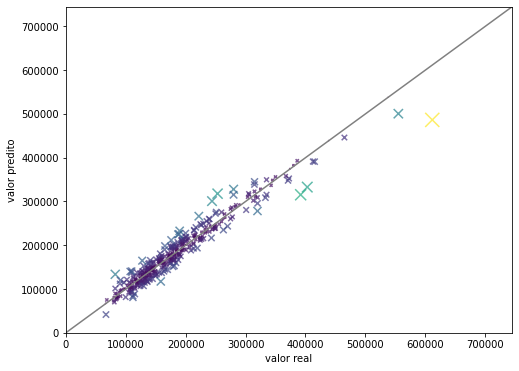

In [ ]:
import matplotlib.pyplot as plt

modelo_treinado = modelo.fit(x_test_norm,y_test)
y_pred = modelo_treinado.predict(x_test_norm)


erros = np.abs(y_pred-y_test)
erros = erros / max(erros)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, s=200*erros, c=erros, alpha=0.7, marker='x')
plt.ylim(0,max(y_pred.max(), y_test.max()))
plt.xlim(0,max(y_pred.max(), y_test.max()))

plt.plot([0,max(y)], [0,max(y)], c='gray')
plt.xlabel('valor real')
plt.ylabel('valor predito')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
rmse_selected = np.sqrt(MSE(y_test, y_pred))
rmse_selected

16463.40882243998

###KNN

O melhor resultado para o KNN foi considerando dois vizinhos, e mesmo assim as predições não foram promissoras.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)
scores = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']
resultados = cross_validate(neigh, x_train_std, y_train, cv=10, scoring=scores)
pd.DataFrame(resultados).mean()

fit_time                                0.014154
score_time                              0.037089
test_neg_mean_absolute_error       -28419.930392
test_neg_root_mean_squared_error   -43429.465899
test_r2                                 0.678196
dtype: float64

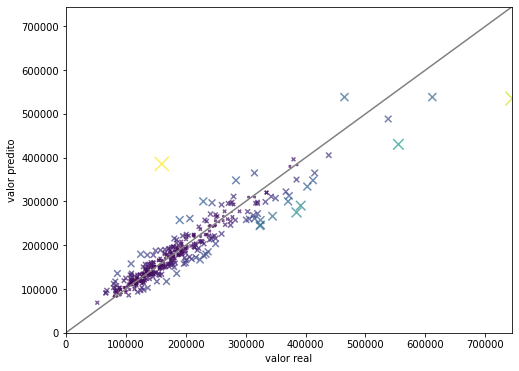

In [ ]:
import matplotlib.pyplot as plt

modelo_treinado = neigh.fit(x_test_std,y_test)
y_pred = modelo_treinado.predict(x_test_std)


erros = np.abs(y_pred-y_test)
erros = erros / max(erros)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, s=200*erros, c=erros, alpha=0.7, marker='x')
plt.ylim(0,max(y_pred.max(), y_test.max()))
plt.xlim(0,max(y_pred.max(), y_test.max()))

plt.plot([0,max(y)], [0,max(y)], c='gray')
plt.xlabel('valor real')
plt.ylabel('valor predito')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
rmse_selected = np.sqrt(MSE(y_test, y_pred))
rmse_selected

28080.091695868836

###Neural Networks

Para as redes neurais, foram testados diferentes números de camadas no Perceptron e também diferentes números de épocas. Além da execução ser mais lenta que os demais modelos, seus resultados não foram satisfatórios em comparação com os demais.

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler

Para usarmos o PyTorch é necessário que o nosso dataset seja compatível com ele, por isso criamos um DataSet do PyTorch.

In [ ]:
class HousePricesDataset(torch.utils.data.Dataset):
  def __init__(self, X, y, scale_data=False):
    if not torch.is_tensor(X) and not torch.is_tensor(y.values):
      if scale_data:
          X = StandardScaler().fit_transform(X)
      self.X = torch.tensor(X)
      self.y = torch.tensor(y.values)

  def __len__(self):
      return len(self.X)

  def __getitem__(self, i):
      return self.X[i], self.y[i]

MLP: Multilayer Perceptron

In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(234, 300),
      nn.ReLU(),
      nn.Linear(300, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 16),
      nn.ReLU(),
      nn.Linear(16, 1)
    )


  def forward(self, x):
    return self.layers(x)

Inicializando o PyTorch DataSet e o Perceptron

In [ ]:
torch.manual_seed(42)

dataset = HousePricesDataset(x_train_std, y_train)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)

mlp = MLP()

# loss_function = nn.L1Loss() #MAE
loss_function = nn.MSELoss() #MSE
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

Treinamento

In [ ]:
for epoch in range(0, 1000): 
  
 # Iterate over the DataLoader for training data
  for i, data in enumerate(trainloader, 0):
    
    # Get and prepare inputs
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()
    targets = targets.reshape((targets.shape[0], 1))
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Perform forward pass
    outputs = mlp(inputs)
    
    # Compute loss
    loss = loss_function(outputs, targets)
    
    # Perform backward pass
    loss.backward()
    
    # Perform optimization
    optimizer.step()
    

# Process is complete.
print('Training process has finished.')

In [ ]:
mlp.eval();

x_test_tensor = torch.FloatTensor(x_test_std)
y_pred = mlp(x_test_tensor)
y_pred = pd.DataFrame(y_pred.detach().numpy())
y_pred = np.float64(y_pred.iloc[:,0])

erros = np.abs(y_pred-y_test)
erros = erros / max(erros)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, s=200*erros, c=erros, alpha=0.7, marker='x')
plt.ylim(0,max(y_pred.max(), y_test.max()))
plt.xlim(0,max(y_pred.max(), y_test.max()))

plt.plot([0,max(y)], [0,max(y)], c='gray')
plt.xlabel('valor real')
plt.ylabel('valor predito')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
rmse_selected = np.sqrt(MSE(y_test, y_pred))
rmse_selected

###SVM

Embora o SVM tenha apresentado um erro médido quadrático extremamente baixo, achamos que poderia ter ocorrido um sobreajuste. Portanto, não utilizamos ele nas submissões.

"Quando a esmola é muita o sábio desconfia" -Zimmer, Raquel 2021.

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_validate

svm_model = svm.SVR(kernel='rbf', C=1000000, gamma= 'scale')
scores = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']
resultados = cross_validate(svm_model, x_train_std, y_train, cv=10, scoring=scores)
pd.DataFrame(resultados).mean()

fit_time                                0.643574
score_time                              0.029805
test_neg_mean_absolute_error       -20883.828549
test_neg_root_mean_squared_error   -35353.336731
test_r2                                 0.789464
dtype: float64

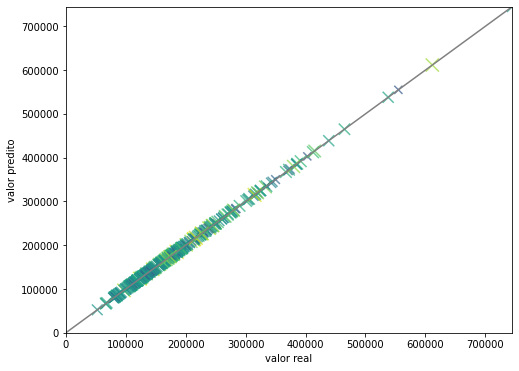

In [ ]:
import matplotlib.pyplot as plt

modelo_treinado_svm = svm_model.fit(x_test_std,y_test)
y_pred = modelo_treinado.predict(x_test_std)


erros = np.abs(y_pred-y_test)
erros = erros / max(erros)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, s=200*erros, c=erros, alpha=0.7, marker='x')
plt.ylim(0,max(y_pred.max(), y_test.max()))
plt.xlim(0,max(y_pred.max(), y_test.max()))

plt.plot([0,max(y)], [0,max(y)], c='gray')
plt.xlabel('valor real')
plt.ylabel('valor predito')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
rmse_selected = np.sqrt(MSE(y_test, y_pred))
rmse_selected

0.10343274192366776

###Random Forest

Implementamos o Random Forest como uma primeira alternativa para a técnica de combinar múltiplos regressores para encontrar o resultado. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

forest_model = RandomForestRegressor(max_features=0.5, n_estimators=2000, random_state=0)
scores = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']
resultados = cross_validate(forest_model, x_train_std, y_train, cv=10, scoring=scores)
pd.DataFrame(resultados).mean()

fit_time                               21.665793
score_time                              0.218532
test_neg_mean_absolute_error       -17049.559387
test_neg_root_mean_squared_error   -27750.435898
test_r2                                 0.868541
dtype: float64

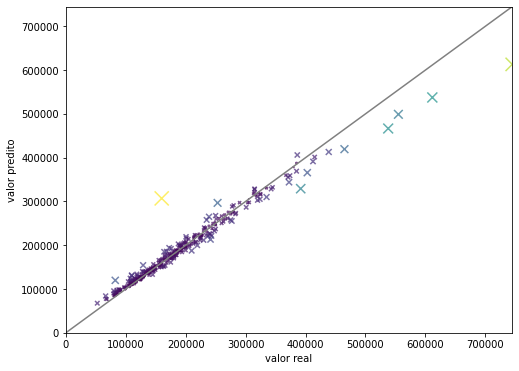

In [ ]:
import matplotlib.pyplot as plt

modelo_treinado = forest_model.fit(x_test_std,y_test)
y_pred = modelo_treinado.predict(x_test_std)


erros = np.abs(y_pred-y_test)
erros = erros / max(erros)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, s=200*erros, c=erros, alpha=0.7, marker='x')
plt.ylim(0,max(y_pred.max(), y_test.max()))
plt.xlim(0,max(y_pred.max(), y_test.max()))

plt.plot([0,max(y)], [0,max(y)], c='gray')
plt.xlabel('valor real')
plt.ylabel('valor predito')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
rmse_selected = np.sqrt(MSE(y_test, y_pred))
rmse_selected

14414.775432746106

###XGBoost

O modelo escolhido para as submissões foi o XGBoost, que além de apresentar um baixo RMSE não aparentou ter se sobreajustado aos dados de treinamento. Inicialmente, decidimos implementá-lo por ser uma técnica amplamente utilizada em problemas de regressão e apresentar bons resultados.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_validate

model_xgb = xgb.XGBRegressor(colsample_bytree=0.35277702636533614,gamma=0.0,learning_rate=0.015227165067438342,max_depth=3,min_child_weight=2,
                  n_estimators=4375,reg_alpha=0.0003247018231544688,reg_lambda=3.796665691251228,subsample=0.6303129151841476,seed=42,silent=1)

resultados = cross_validate(model_xgb, x_train_std, y_train, cv=10)
pd.DataFrame(resultados).mean()

fit_time      10.916022
score_time     0.016993
test_score     0.876536
dtype: float64

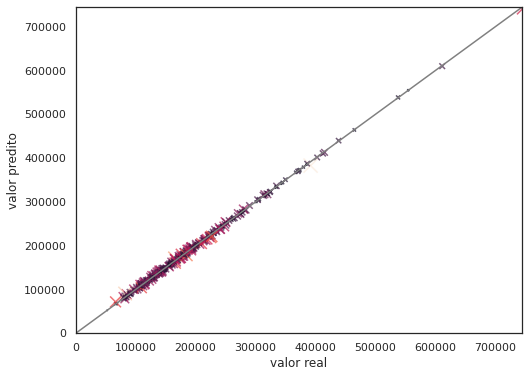

In [ ]:
import matplotlib.pyplot as plt

modelo_treinado_xgb = model_xgb.fit(x_test_std,y_test)
y_pred = modelo_treinado_xgb.predict(x_test_std)


erros = np.abs(y_pred-y_test)
erros = erros / max(erros)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, s=200*erros, c=erros, alpha=0.7, marker='x')
plt.ylim(0,max(y_pred.max(), y_test.max()))
plt.xlim(0,max(y_pred.max(), y_test.max()))

plt.plot([0,max(y)], [0,max(y)], c='gray')
plt.xlabel('valor real')
plt.ylabel('valor predito')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
rmse_selected = np.sqrt(MSE(y_test, y_pred))
rmse_selected

2082.4423083535808

##Submission

###Primeira Submissão

XGBoost com ajustes manuais dos hiperparâmetros e sem a remoção de features menos importantes.

In [ ]:
y_pred = modelo_treinado_xgb.predict(x_test_final_std)
filename = 'submission.csv'
pd.DataFrame({'Id': df_teste_final.Id, 'SalePrice': y_pred}).to_csv(filename, index=False)

###Segunda Submissão

XGBoost com remoção de atributos menos importantes e hiperparâmetros ajustados por algoritmo.

In [ ]:
y_pred = modelo_treinado_xgb.predict(x_test_final_std)
filename = 'submission_final.csv'
pd.DataFrame({'Id': df_teste_final.Id, 'SalePrice': y_pred}).to_csv(filename, index=False)